In [39]:
# Standard Imports
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.rcParams['font.size'] = 14
import seaborn as sns
%matplotlib inline

In [2]:
# Performance
from time import time

In [3]:
# Machine Learning
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Helper
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.cross_validation import cross_val_predict
from sklearn import metrics

# Preliminaries

In [6]:
# Load in the Data
train = pd.read_csv('input/train2.csv')
test = pd.read_csv('input/test2.csv')

In [35]:
test.head()

,PassengerId,Pclass,SibSp,Parch,Fare,Gender,Port,AgeFill
0,892,3,0,0,7.8292,1,2,34.5
1,893,3,1,0,7.0000,0,0,47.0
2,894,2,0,0,9.6875,1,2,62.0
3,895,3,0,0,8.6625,1,0,27.0
4,896,3,1,1,12.2875,0,0,22.0


In [11]:
# null accuracy
null_accuracy = train.Survived.value_counts().max()/len(train.Survived)
print(null_accuracy)

0.617547806524


In [12]:
# Create the random forest object which will include all the parameters
# for the fit
forest = RandomForestClassifier(n_estimators = 100)

# Fit the training data to the Survived labels and create the decision trees
# forest.fit(training[0::,2::],training[0::,1])
forest.fit(train[['Pclass', 'Fare', 'Gender', 'AgeFill']], train['Survived'])



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
forest_train_pred = cross_val_predict(forest, train[['Pclass', 'Fare', 'Gender', 'AgeFill']], train['Survived'], cv=2)
print("Random forest accuracy: ", metrics.accuracy_score(train.Survived, forest_train_pred))

Random forest accuracy:  0.775028121485


In [ ]:
# Take the same decision trees and run it on the test data
output = forest.predict(test)

# Model evaluation

In [15]:
# basic comparison
print('Pred:', forest_train_pred[0:10])
print('True:', train.Survived[0:10])

Pred: [0 1 0 1 0 0 1 1 1 1]
True: 0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64


In [22]:
labels = ["Died", "Lived"]
confusion = metrics.confusion_matrix(train.Survived, forest_train_pred)
print(confusion)
# columns are predicted (0, 1)
# rows are actual values (0, 1)

[[461  88]
 [112 228]]


In [ ]:
# what metric want to optimize? reduce false positives (spam filter; specificity/precision)
# or false negatives (fraud detection; sensitivity)?

# in this case, sensitivity is low - detecting less than 70% of titanic survivors

In [25]:
# Sensitivity/true positive (when actual value is positive, 
# how often is prediction correct?)

# 228/(228+112)
print(metrics.recall_score(train.Survived, forest_train_pred))

0.670588235294


In [28]:
# Specificity (when actual value is negative,
# how often is prediction correct?)

print(461/(461+88))

0.8397085610200364


In [29]:
# False positive rate: when actual value is negative, 
# how often is the prediction incorrect?

print(88/(461+88))

0.16029143897996356


In [30]:
# Precision of the classifier: when positive value is PREDICTED,
# how often is the prediction correct?

print(metrics.precision_score(train.Survived, forest_train_pred))

0.721518987342


# Adjusting classification threshold

In [48]:
features = ['Pclass', 'Fare', 'Gender', 'AgeFill']
forest.predict(train[features])[0:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [49]:
forest.predict_proba(train[features])[0:10, :]

array([[ 1.  ,  0.  ],
       [ 0.02,  0.98],
       [ 0.17,  0.83],
       [ 0.  ,  1.  ],
       [ 1.  ,  0.  ],
       [ 0.99,  0.01],
       [ 0.87,  0.13],
       [ 0.65,  0.35],
       [ 0.13,  0.87],
       [ 0.  ,  1.  ]])

In [50]:
y_pred_prob = forest.predict_proba(train[features])[:, 1]

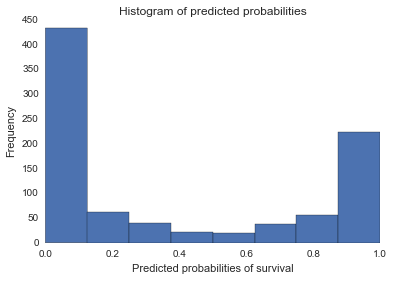

In [40]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins = 8)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probabilities of survival')
plt.ylabel('Frequency')

In [45]:
# decrease the threshold for predicting survival in order
# to increase the sensitivity of the classifier
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob, 0.30)[0]

In [46]:
y_pred_prob[0:10]

array([ 0.  ,  0.98,  0.83,  1.  ,  0.  ,  0.01,  0.13,  0.35,  0.87,  1.  ])

In [47]:
y_pred_class[0:10]

array([ 0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.])

In [52]:
# previous confusion matrix
print(confusion)

[[461  88]
 [112 228]]


In [ ]:
# new confusion matrix
print(metrics.confusion_matrix(test.))